# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [1]:
import os
import sys

In [2]:

from google.colab import drive
drive.mount('/content/drive')

# INSTRUCTIONS:
# Open in a BROWSER https://drive.google.com/file/d/1I8Ry7Z_QqnlARwOuDgN4NPCd-GcLw1OC/view?usp=drive_link
# Download the file cw1_files.zip
# Go to https://drive.google.com/ and log in with the account you will be using for this coursework
# In the folder 'My Files' upload cw1_files.zip (DO NOT UNZIP THE FILE)
# Run the following:

!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')



Mounted at /content/drive
Archive:  /content/drive/MyDrive/cw1_files.zip
   creating: ./cw1_files/
  inflating: ./__MACOSX/._cw1_files  
   creating: ./cw1_files/ese-invldm/
  inflating: ./__MACOSX/cw1_files/._ese-invldm  
  inflating: ./cw1_files/run.sh      
  inflating: ./__MACOSX/cw1_files/._run.sh  
   creating: ./cw1_files/files/
  inflating: ./__MACOSX/cw1_files/._files  
  inflating: ./cw1_files/ese-invldm/setup.py  
  inflating: ./__MACOSX/cw1_files/ese-invldm/._setup.py  
   creating: ./cw1_files/ese-invldm/ese_invldm/
  inflating: ./__MACOSX/cw1_files/ese-invldm/._ese_invldm  
   creating: ./cw1_files/files/autoencoder/
  inflating: ./__MACOSX/cw1_files/files/._autoencoder  
  inflating: ./cw1_files/files/default_config.yml  
  inflating: ./__MACOSX/cw1_files/files/._default_config.yml  
  inflating: ./cw1_files/files/config_training.yml  
  inflating: ./__MACOSX/cw1_files/files/._config_training.yml  
   creating: ./cw1_files/files/diffusion/
  inflating: ./__MACOSX/cw1_fil

In [3]:
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Cloning the repository from https://github.com/dpelacani/InverseLDM.git...
Cloning into 'InverseLDM'...
remote: Enumerating objects: 1331, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 1331 (delta 167), reused 182 (delta 100), pack-reused 1070 (from 1)
Receiving objects: 100% (1331/1331), 467.16 KiB | 22.25 MiB/s, done.
Resolving deltas: 100% (875/875), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 39.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""

num_samples = 2048  # Total samples to generate
num_inference_steps = 50  # High number of steps for refinement
batch_size = 64  # Smaller batch size for sharper individual images
scheduler = "ddim"  # DDIM scheduler for efficient sampling
temperature = 0.5  # Moderate diversity
seed = 42  # For reproducibility

# Generate images
generated_images_batches = generate(
    num_samples=num_samples,
    num_inference_steps=num_inference_steps,
    batch_size=batch_size,
    scheduler=scheduler,
    temperature=temperature,
    seed=seed,
)

# Move tensors to CPU and convert to NumPy arrays before concatenation
generated_images_batches = [batch.cpu().numpy() for batch in generated_images_batches]

# Flatten the batches into a single list of images
generated_images = np.concatenate(generated_images_batches, axis=0)


# Save the generated dataset (optional, for reusability)
np.save('generated_brain_images.npy', generated_images)

/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

Batch 0


100%|██████████| 50/50 [00:06<00:00,  7.87it/s]


Batch 1


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 2


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 3


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 4


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 5


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 6


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 7


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 8


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 9


100%|██████████| 50/50 [00:06<00:00,  8.31it/s]


Batch 10


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 11


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 12


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 13


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 14


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 15


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 16


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 17


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 18


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 19


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 20


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 21


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 22


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 23


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 24


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 25


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


Batch 26


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 27


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 28


100%|██████████| 50/50 [00:06<00:00,  8.29it/s]


Batch 29


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 30


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 31


100%|██████████| 50/50 [00:05<00:00,  8.36it/s]


### Plotting 10 Test Images

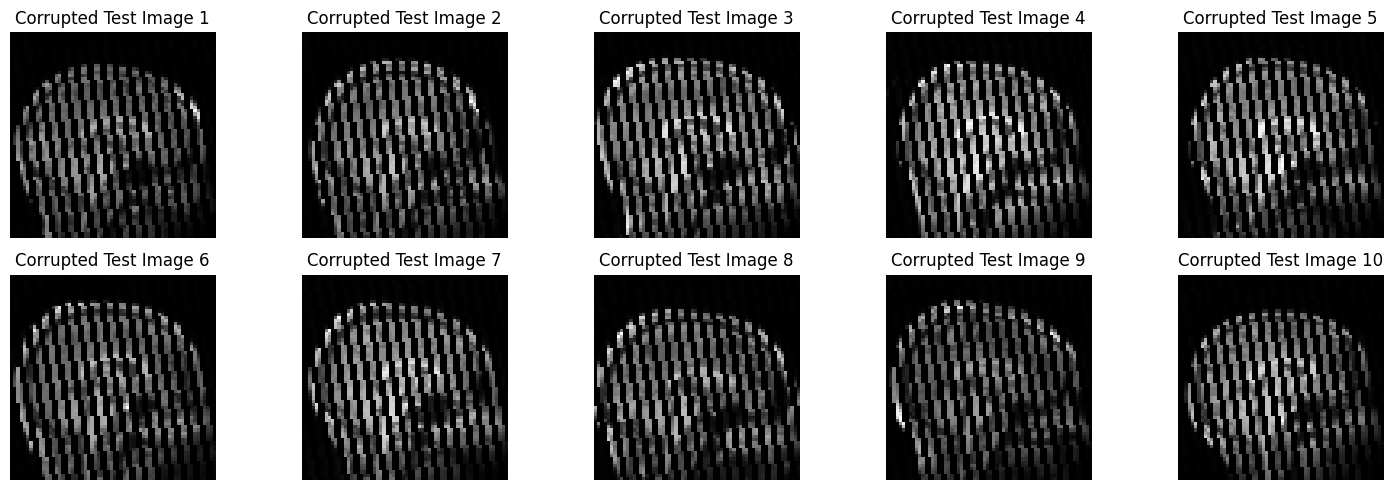

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
test_images = np.load('test_set.npy')
test_images = np.squeeze(test_images)

# Plot the first 10 images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Corrupted Test Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
# Save the first generated image to a CSV file
np.savetxt('test_brain_image_0.csv', test_images[0], delimiter=",")

### Plotting 10 Generated Training Images

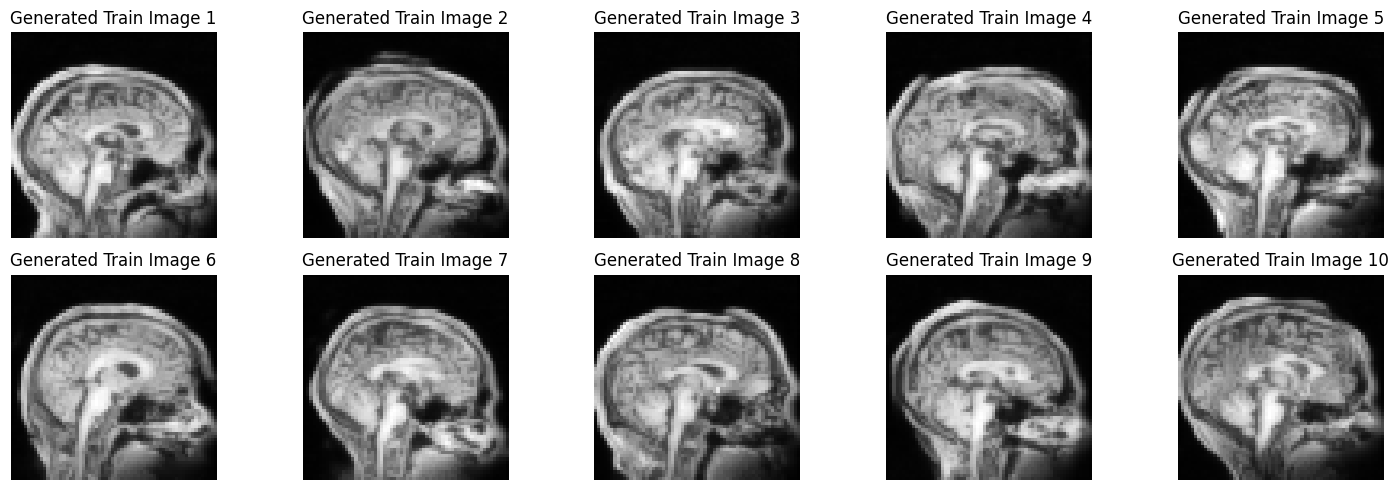

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
generated_images = np.load('generated_brain_images.npy')
generated_images = np.squeeze(generated_images)

# Plot the first 10 images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.title(f"Generated Train Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [7]:
print(len(generated_images))
print(len(test_images))

2048
100


<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



# Mask Creation

After I tried to create a mask manually that would match the missing pixels of the test dataset, I decided to use the mask of the test images directly by extracting all pixels that are 0 from the first test image and using these as masks for my training image. I checked that this mask is consistent for all test images.

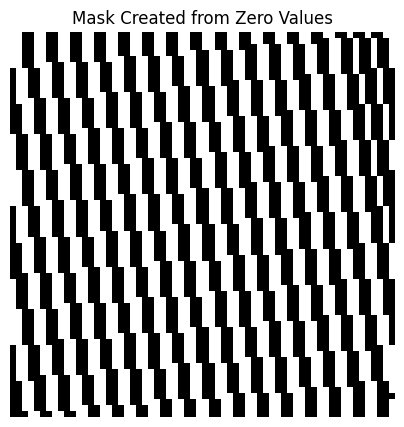

In [9]:
import torch

import numpy as np


def corrupt_images(image, mask):
    """
    Corrupt an image by applying the mask.

    Parameters:
        image (torch.Tensor): The original image tensor.
        mask (torch.Tensor): The mask tensor.

    Returns:
        torch.Tensor: The corrupted image.
    """
    return image * mask

# Convert the image to a NumPy array
image_array = np.array(test_images[0])

# Create the mask
mask = (image_array != 0).astype(np.uint8)

# Visualize the mask
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(mask, cmap="gray")
plt.title("Mask Created from Zero Values")
plt.axis('off')
plt.show()

In [10]:
from torch.utils.data import random_split, TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
generated_images_tensor = torch.tensor(generated_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).unsqueeze(1)  # Add channel dimension

# Corrupt the training images
corrupted_train_images = corrupt_images(generated_images_tensor, mask)

# Combine corrupted and original images into a dataset
full_dataset = TensorDataset(corrupted_train_images, generated_images_tensor)

# Split the full dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(full_dataset))
valid_size = len(full_dataset) - train_size
train_dataset, valid_dataset = random_split(full_dataset, [train_size, valid_size])

# Create DataLoaders for training and validation
batch_size = 10
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Test Dataset: (Corrupted Image only)
test_dataset = TensorDataset(test_images_tensor)  # No labels
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoaders for training, validation, and testing initialized!")

DataLoaders for training, validation, and testing initialized!


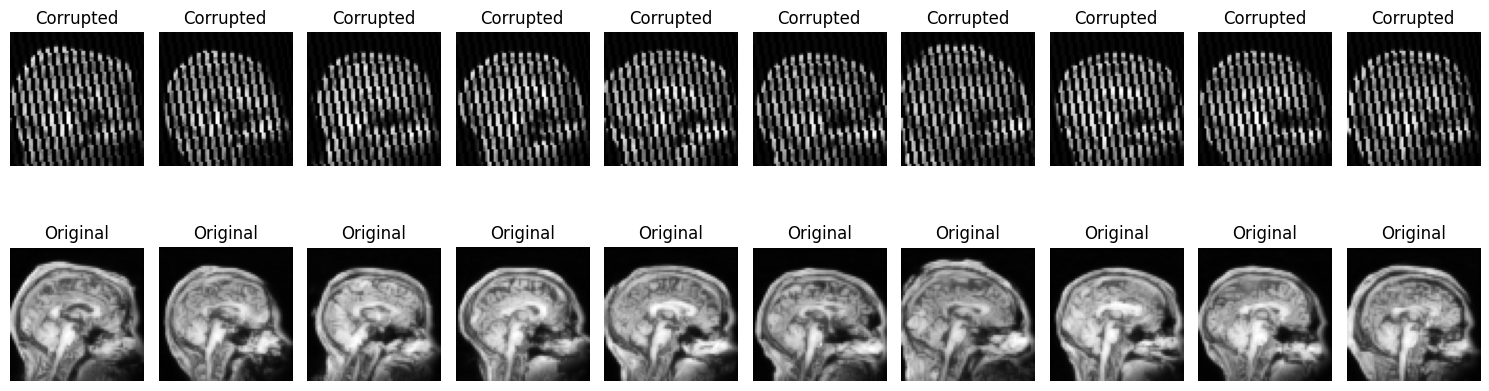

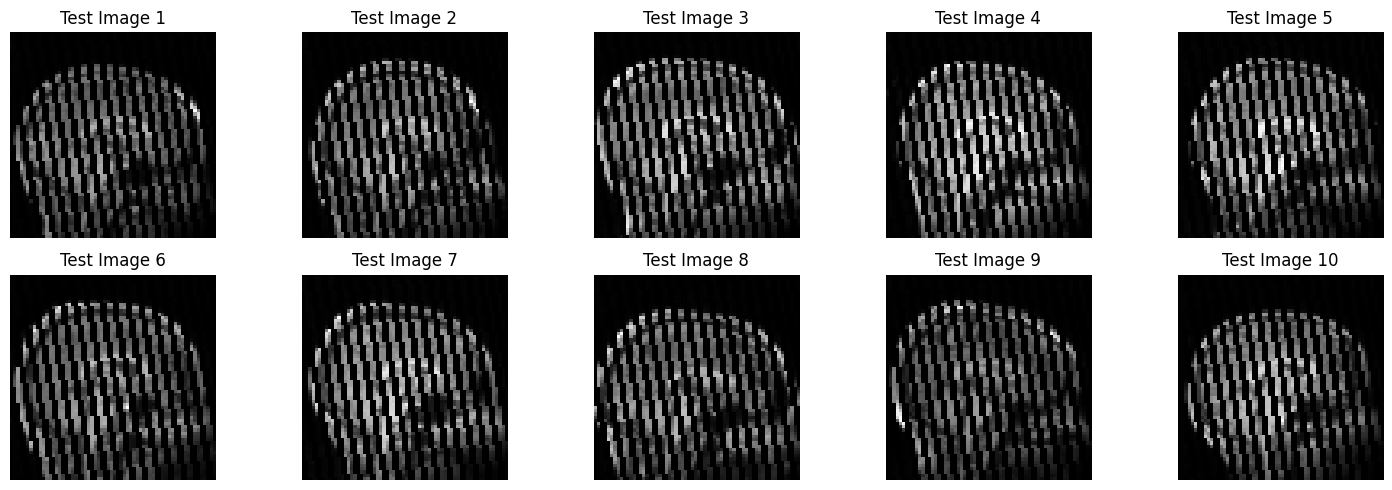

In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Visualize 10 samples from the training set
plt.figure(figsize=(15, 5))
for i, (corrupted, original) in enumerate(train_dataloader):
    if i == 1:  # Display only the first batch
        break
    for j in range(10):
        # Plot corrupted image
        plt.subplot(2, 10, j + 1)
        plt.imshow(corrupted[j, 0].numpy(), cmap='gray')  # Show corrupted image
        plt.title("Corrupted")
        plt.axis('off')

        # Plot original image
        plt.subplot(2, 10, j + 11)
        plt.imshow(original[j, 0].numpy(), cmap='gray')  # Show original image
        plt.title("Original")
        plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize 10 samples from the test set
plt.figure(figsize=(15, 5))
for i, batch in enumerate(test_dataloader):
    if i == 1:  # Display only the first batch
        break
    for j in range(10):
        plt.subplot(2, 5, j + 1)
        plt.imshow(batch[0][j, 0].numpy(), cmap='gray')  # Show test image
        plt.title(f"Test Image {j+1}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Check the size of the first sample in the train dataset
input_image, label_image = train_dataset[0]
print("Input Image Size:", input_image.size())
print("Label Image Size:", label_image.size())

# Optional: Check the total number of samples
print("Number of Samples in Train Dataset:", len(train_dataset))

# Check the size of the first sample in the Validation dataset
input_image, label_image = valid_dataset[0]
print("Input Image Size:", input_image.size())
print("Label Image Size:", label_image.size())

# Optional: Check the total number of samples
print("Number of Samples in Train Dataset:", len(valid_dataset))

Input Image Size: torch.Size([1, 64, 64])
Label Image Size: torch.Size([1, 64, 64])
Number of Samples in Train Dataset: 1638
Input Image Size: torch.Size([1, 64, 64])
Label Image Size: torch.Size([1, 64, 64])
Number of Samples in Train Dataset: 410


<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


# Architecture Choice

I am choosing the U-Net Architecture, because as we learned in the lecture/execise an Day 3 about recovering missing parts of Chest X-rays, its much better to use convolutions than a linear approach like a simple FNN. I also prefer the U-Net as opposed to a GAN because the training process is more stable. Compared to a Variational Autoencoder I think the U-Net is better suited for this task, because is is able to preserve more information in the bottleneck due to a high number of channels, compared the latent layer of a classical Autoencoder.

At first I designed the U-net myself from scratch and the results were reasonably good but a bit blury and the training was quite unstable. Therefore, during the design of the present network I took inspiration from the U-net that was displayed in the exercise solution of day 8 on diffusion models. I initially adapted this model to fit this task by removing any time dependant embeddings that were in there due to the diffusion application.

Furthermore:

- I decided to include skip connections in my model because they allow me to keep fine-grained spatial details and combine them with the global context from the encoder.

- I chose 3x3 convolution layers, because combined with a padding of 1 they allow me to preserve the spatial dimensions of the input picture. For the activation function I chose SiLU because of it improved differentiability compared to ReLU. I also keep the batch normalization in order to avoid internal covariate shift.

- Encoder Design: Each encoder block consists of a 2 convolutional layers followed by a max-pool layer, which allow me extract wich spatial features and allow the model to focus on higher level features each layer of the encoder.

- Decoder Design: I am using a transposed convolutional layer, because we learned in the lecture this is the best way to recover spatial resolution. Similar to the encoder this is followed by two convolutional layers to refine the reconstructed features.

- The Bottleneck consists of 1024 channels with a 4x4 pixels size, I found this to be a good balance between extracting high level features and preserving enough information for accurate reconstruction.

- I decided to use dropout of 0.2 after the activation functions, which improved my validation loss by 0.0001 and therefore decreased overfitting.

In general I tried to maintain a modular architecture to ensure the model is easy to understand, extend, or modify.



Notes:

- At first I struggled to achieve the correct output size of 64 x 64 and I solved this problem by calculating the output sizes of each convolutional block with a ConvNet Shape Calculator (ref. 1) This way I able to aling the en- and decoder in a way that would produce the original image size (64x64).

- I tried different variantions of the U-net and it took me a while to get it to converge. Finally what made it work for me was adding skip connections. I believe the skip connections help to preseve some of the information that is otherwise lost due to the deep encoding.

- I tried including a sigmoidal activation function but this caused my model to break, possibly because a lot of values are being diminished, since they alreay are quite close to zero.


In [13]:
import torch
import torch.nn as nn

# Define a convolutional block with dropout
class ConvBlock(nn.Module):
    """Convolutional block with dropout"""
    def __init__(self, in_c, out_c, dropout_prob=0.2):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_c)
        self.act = nn.SiLU()
        self.dropout = nn.Dropout2d(p=dropout_prob)  # 2D Dropout for feature maps

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        x = self.dropout(x)  # Apply dropout
        return x

# Define the encoder block
class EncBlock(nn.Module):
    """U-Net encoder block with dropout"""
    def __init__(self, in_c, out_c, dropout_prob=0.2):
        super().__init__()
        self.conv_block1 = ConvBlock(in_c, out_c, dropout_prob)
        self.conv_block2 = ConvBlock(out_c, out_c, dropout_prob)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, x):
        h = self.conv_block1(x)
        h = self.conv_block2(h)
        p = self.pool(h)
        return h, p

# Define the decoder block
class DecBlock(nn.Module):
    """U-Net decoder block with dropout"""
    def __init__(self, in_c, out_c, dropout_prob=0.2):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv_block1 = ConvBlock(out_c + out_c, out_c, dropout_prob)  # +out_c for skip connection
        self.conv_block2 = ConvBlock(out_c, out_c, dropout_prob)

    def forward(self, x, skip):
        h = self.up(x)
        h = torch.cat([h, skip], axis=1)  # Concatenate with skip connection
        h = self.conv_block1(h)
        h = self.conv_block2(h)
        return h

# Define the full U-Net model with dropout
class UNet(nn.Module):
    """U-Net for image reconstruction with dropout"""
    def __init__(self, dropout_prob=0.2):
        super().__init__()
        # Encoder
        self.enc1 = EncBlock(1, 64, dropout_prob)  # Input: grayscale (1 channel)
        self.enc2 = EncBlock(64, 128, dropout_prob)
        self.enc3 = EncBlock(128, 256, dropout_prob)
        self.enc4 = EncBlock(256, 512, dropout_prob)

        # Bottleneck
        self.bottleneck = ConvBlock(512, 1024, dropout_prob)

        # Decoder
        self.dec4 = DecBlock(1024, 512, dropout_prob)
        self.dec3 = DecBlock(512, 256, dropout_prob)
        self.dec2 = DecBlock(256, 128, dropout_prob)
        self.dec1 = DecBlock(128, 64, dropout_prob)

        # Output layer
        self.out_conv = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        # Encoder
        s1, p1 = self.enc1(x)
        s2, p2 = self.enc2(p1)
        s3, p3 = self.enc3(p2)
        s4, p4 = self.enc4(p3)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder
        d4 = self.dec4(b, s4)
        d3 = self.dec3(d4, s3)
        d2 = self.dec2(d3, s2)
        d1 = self.dec1(d2, s1)

        # Output
        out = self.out_conv(d1)
        return out

In [14]:
from torchsummary import summary

# Instantiate the model
model = UNet().to("cuda" if torch.cuda.is_available() else "cpu")

# Display the model summary
summary(model, input_size=(1, 64, 64))  # Input: single channel (grayscale), 64x64

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]             640
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              SiLU-3           [-1, 64, 64, 64]               0
         Dropout2d-4           [-1, 64, 64, 64]               0
         ConvBlock-5           [-1, 64, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]          36,928
       BatchNorm2d-7           [-1, 64, 64, 64]             128
              SiLU-8           [-1, 64, 64, 64]               0
         Dropout2d-9           [-1, 64, 64, 64]               0
        ConvBlock-10           [-1, 64, 64, 64]               0
        MaxPool2d-11           [-1, 64, 32, 32]               0
         EncBlock-12  [[-1, 64, 64, 64], [-1, 64, 32, 32]]               0
           Conv2d-13          [-1, 128, 32, 32]          73,856
      BatchNorm2d-14        

<br>

---

<br>

Epoch 1/150, Train Loss: 0.0291, Validation Loss: 0.0018
Epoch 2/150, Train Loss: 0.0058, Validation Loss: 0.0016
Epoch 3/150, Train Loss: 0.0037, Validation Loss: 0.0016
Epoch 4/150, Train Loss: 0.0028, Validation Loss: 0.0013
Epoch 5/150, Train Loss: 0.0024, Validation Loss: 0.0012
Epoch 6/150, Train Loss: 0.0020, Validation Loss: 0.0011
Epoch 7/150, Train Loss: 0.0019, Validation Loss: 0.0010
Epoch 8/150, Train Loss: 0.0018, Validation Loss: 0.0009
Epoch 9/150, Train Loss: 0.0016, Validation Loss: 0.0009
Epoch 10/150, Train Loss: 0.0016, Validation Loss: 0.0010
Epoch 11/150, Train Loss: 0.0015, Validation Loss: 0.0008
Epoch 12/150, Train Loss: 0.0014, Validation Loss: 0.0008
Epoch 13/150, Train Loss: 0.0015, Validation Loss: 0.0008
Epoch 14/150, Train Loss: 0.0014, Validation Loss: 0.0010
Epoch 15/150, Train Loss: 0.0014, Validation Loss: 0.0009
Epoch 16/150, Train Loss: 0.0013, Validation Loss: 0.0007
Epoch 17/150, Train Loss: 0.0013, Validation Loss: 0.0007
Epoch 18/150, Train Los

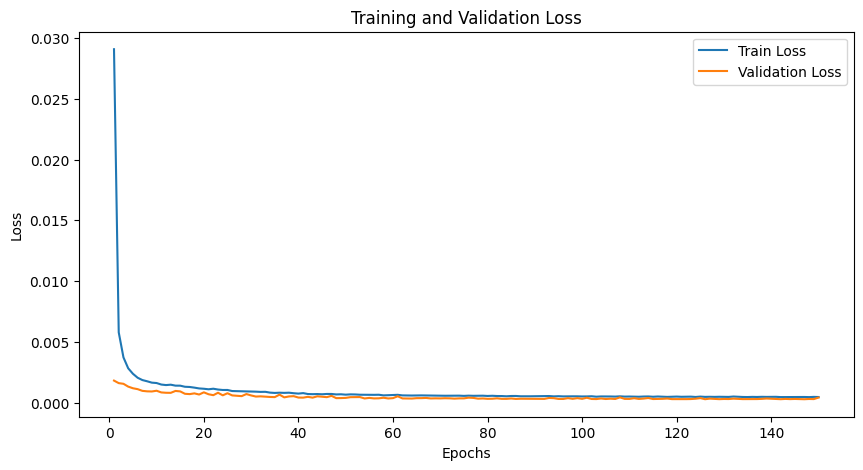

In [15]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms


# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training and validation loop
num_epochs = 150
train_losses = []
valid_losses = []

# Define model, loss function, and optimizer
model = UNet().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_epoch_loss = 0

    for corrupted, original in train_dataloader:
        corrupted, original = corrupted.to(device), original.to(device)

        # Forward pass
        outputs = model(corrupted)
        loss = criterion(outputs, original)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_epoch_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = train_epoch_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    valid_epoch_loss = 0
    with torch.no_grad():  # Disable gradient computation for validation
        for corrupted, original in valid_dataloader:
            corrupted, original = corrupted.to(device), original.to(device)

            # Forward pass
            outputs = model(corrupted)
            loss = criterion(outputs, original)

            valid_epoch_loss += loss.item()

    # Calculate average validation loss for the epoch
    avg_valid_loss = valid_epoch_loss / len(valid_dataloader)
    valid_losses.append(avg_valid_loss)

    # Print training and validation loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Validation Loss: {avg_valid_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), "unet_model_with_validation.pth")
print("Training complete. Model saved as 'unet_model_with_validation.pth'.")

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Reconstructed test images saved as 'test_set_nogaps.npy'.


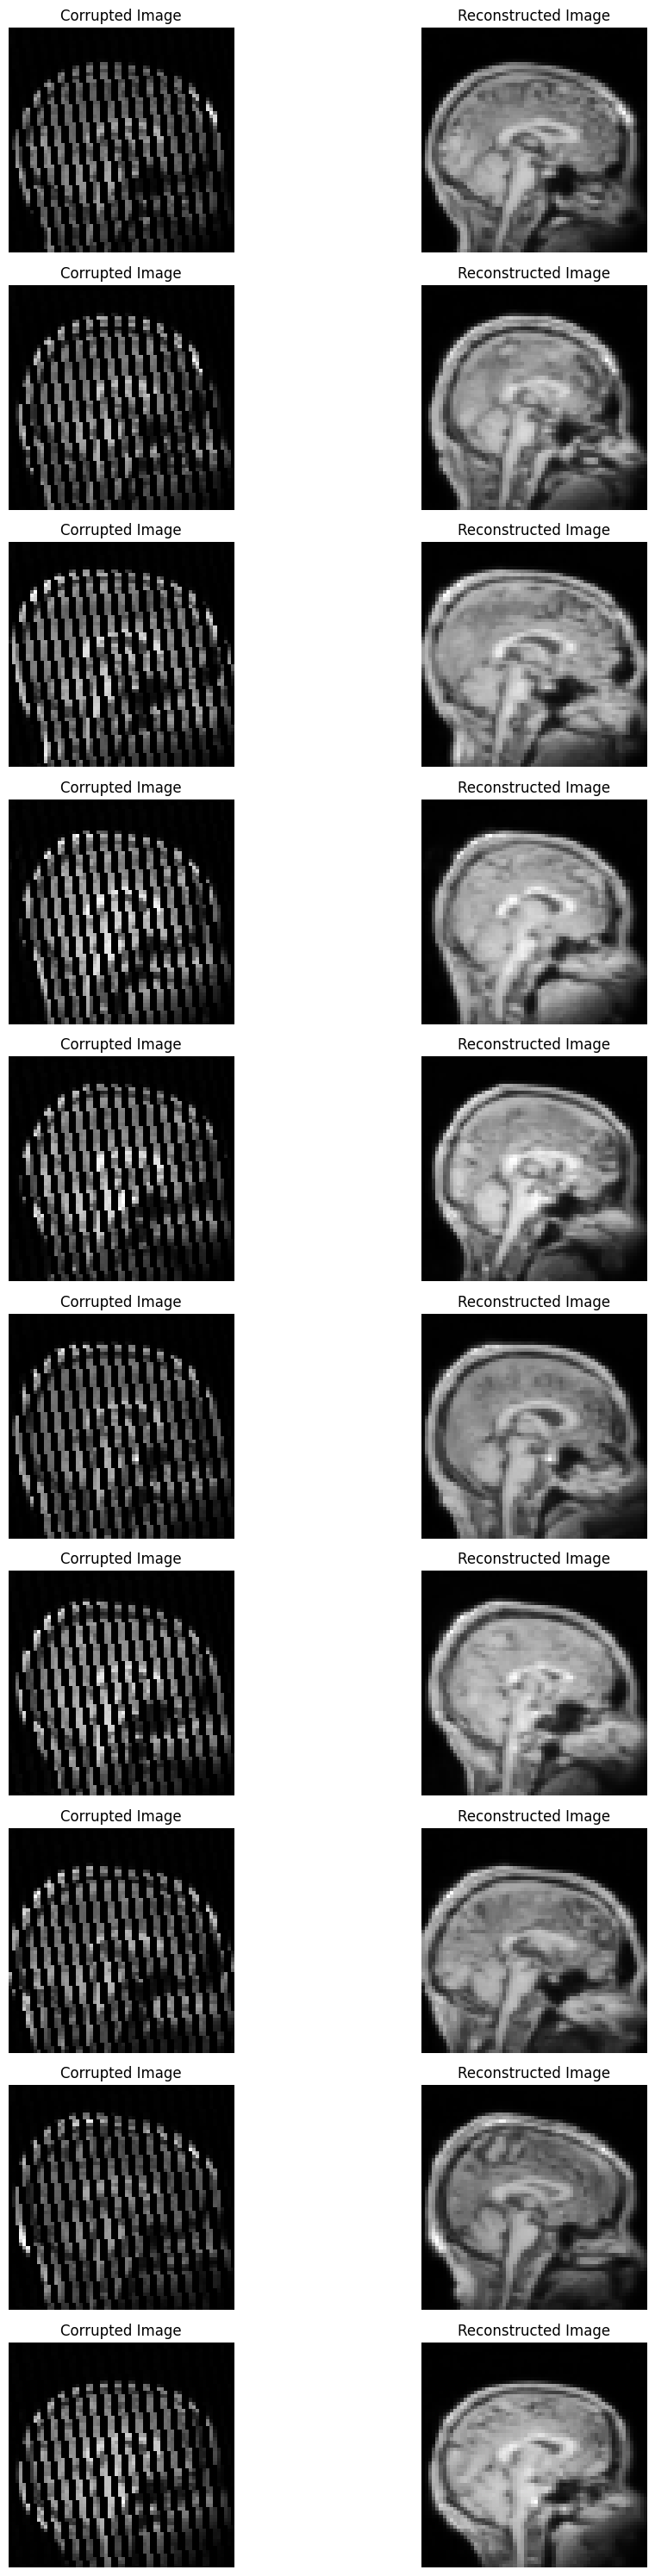

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Ensure the model is in evaluation mode
model.eval()

# List to store reconstructed test images
reconstructed_images = []

# Apply the model to the test dataset
with torch.no_grad():  # No need for gradients during inference
    for batch in test_dataloader:
        corrupted_images = batch[0].to(device)  # Load the corrupted test images
        outputs = model(corrupted_images)  # Get model predictions
        reconstructed_images.append(outputs.cpu().numpy())  # Move to CPU and convert to numpy

# Concatenate all reconstructed images into a single numpy array
reconstructed_images = np.concatenate(reconstructed_images, axis=0)

# Save reconstructed images as a .npy file
np.save("test_set_nogaps.npy", reconstructed_images)
print("Reconstructed test images saved as 'test_set_nogaps.npy'.")

# Plot 10 examples (corrupted vs. reconstructed)
num_examples = 10
fig, axes = plt.subplots(num_examples, 2, figsize=(12, 30))  # Increase width and height
for i in range(num_examples):
    # Original corrupted image
    corrupted_image = test_images_tensor[i].squeeze(0).cpu().numpy()
    # Corresponding reconstructed image
    reconstructed_image = reconstructed_images[i].squeeze(0)

    # Plot corrupted image
    axes[i, 0].imshow(corrupted_image, cmap="gray")
    axes[i, 0].set_title("Corrupted Image")
    axes[i, 0].axis("off")

    # Plot reconstructed image
    axes[i, 1].imshow(reconstructed_image, cmap="gray")
    axes[i, 1].set_title("Reconstructed Image")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

Shape of test set: (100, 1, 64, 64)


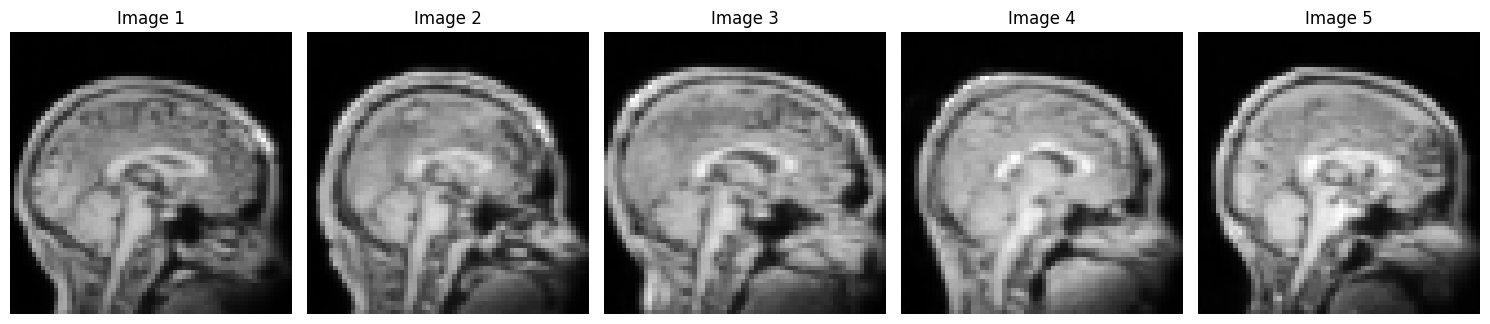

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
test_set = np.load("test_set_nogaps.npy")

# Check the size of the array
print("Shape of test set:", test_set.shape)

# Plot the first 5 images
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 5))

for i in range(num_images_to_plot):
    image = test_set[i].squeeze(0)  # Extract the i-th image
    axes[i].imshow(image, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()